# **Import Libraries and modules**

In [1]:
# https://keras.io/
!pip install -q keras
import keras
import datetime
print(datetime.datetime.now())

Using TensorFlow backend.


2019-06-19 20:07:09.953477


In [11]:
import numpy as np

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist
print(datetime.datetime.now())

2019-06-19 20:07:55.693252


### Load pre-shuffled MNIST data into train and test sets

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(datetime.datetime.now())

11493376/11490434 [==============================] - 0s 0us/step
2019-06-19 20:07:10.465359


(60000, 28, 28)
2019-06-19 20:07:10.491574


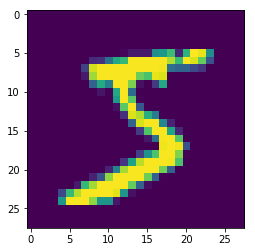

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])
print(datetime.datetime.now())

In [5]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)
print(datetime.datetime.now())

2019-06-19 20:07:10.649418


In [6]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print(datetime.datetime.now())

2019-06-19 20:07:10.803896


In [7]:
y_train[:10]
print(datetime.datetime.now())

2019-06-19 20:07:10.810529


In [8]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(datetime.datetime.now())

2019-06-19 20:07:10.825184


In [9]:
Y_train[:10]
print(datetime.datetime.now())

2019-06-19 20:07:10.831773


In [19]:
## MAIN BLOCK

from keras.layers import Input, Add, Conv2D, Activation

x1 = Input(shape=(28, 28, 1))

x2 = Conv2D(32, (3, 3), activation='relu', padding='same')(x1)

add1 = Add()([x1, x2])
x3 = Conv2D(32, (3,3), activation='relu', padding='same')(add1)


add2 = Add()([x1, x2, x3])
x4 = MaxPooling2D(pool_size=(2,2))(add2)

x5 = Conv2D(32, (3,3), activation='relu', padding='same')(x4)

add3 = Add()([x4, x5])
x6 = Conv2D(32, (3,3), activation='relu', padding='same')(add3)

add4 = Add()([x4, x5, x6])
x7 = Conv2D(32, (3,3), activation='relu', padding='same')(add4)

add5 = Add()([x5, x6, x7])
x8 = MaxPooling2D(pool_size=(2,2))(add5)

x9 = Conv2D(32, (3,3), activation='relu', padding='same')(x8)

add6 = Add()([x8, x9])
x10 = Conv2D(32, (3,3), activation='relu', padding='same')(add6)

add7 = Add()([x8, x9, x10])
x11 = Conv2D(32, (3,3), activation='relu', padding='same')(add7)

x12 = Conv2D(10, (7, 7)) (x11)

x13 = Flatten()(x12)
output = Activation('softmax')(x13)

model = Model(inputs=[x1], outputs=[output])

print(datetime.datetime.now())

2019-06-19 20:15:04.379388


In [20]:
model.summary()

print(datetime.datetime.now())

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
conv2d_31 (Conv2D)              (None, 28, 28, 32)   320         input_5[0][0]                    
__________________________________________________________________________________________________
add_25 (Add)                    (None, 28, 28, 32)   0           input_5[0][0]                    
                                                                 conv2d_31[0][0]                  
__________________________________________________________________________________________________
conv2d_32 (Conv2D)              (None, 28, 28, 32)   9248        add_25[0][0]                     
__________

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])
print(datetime.datetime.now())

2019-06-19 20:15:12.123233


In [22]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)
print(datetime.datetime.now())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 14s 229us/step - loss: 0.1445 - acc: 0.9546
Epoch 2/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0578 - acc: 0.9820
Epoch 3/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0440 - acc: 0.9865
Epoch 4/10
60000/60000 [==============================] - 13s 215us/step - loss: 0.0360 - acc: 0.9887
Epoch 5/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0325 - acc: 0.9897
Epoch 6/10
60000/60000 [==============================] - 13s 217us/step - loss: 0.0285 - acc: 0.9912
Epoch 7/10
60000/60000 [==============================] - 13s 218us/step - loss: 0.0252 - acc: 0.9922
Epoch 8/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0224 - acc: 0.9930
Epoch 9/10
60000/60000 [==============================] - 13s 214us/step - loss: 0.0223 - acc: 0.9932
Epoch 10/10
60000/60000 [==============================] - 13s 214us/step - loss: 

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(datetime.datetime.now())

2019-06-19 20:17:30.407071


In [24]:
print(score)
print(datetime.datetime.now())

[0.047289932724080566, 0.9895]
2019-06-19 20:17:32.246311
